In [273]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [274]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [275]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData
from sqlalchemy.orm import create_session


In [276]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [277]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)
# reflect the tables


In [278]:
# View all of the classes that automap found
for mappedclass in Base.classes:
    print (mappedclass)

<class 'sqlalchemy.ext.automap.station'>
<class 'sqlalchemy.ext.automap.measurement'>


In [279]:
# Save references to each table

Station = Base.classes.station
Measurement = Base.classes.measurement

In [280]:
# Create our session (link) from Python to the DB
session = create_session(bind = engine)

# Exploratory Precipitation Analysis

In [281]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date[0]

'2017-08-23'

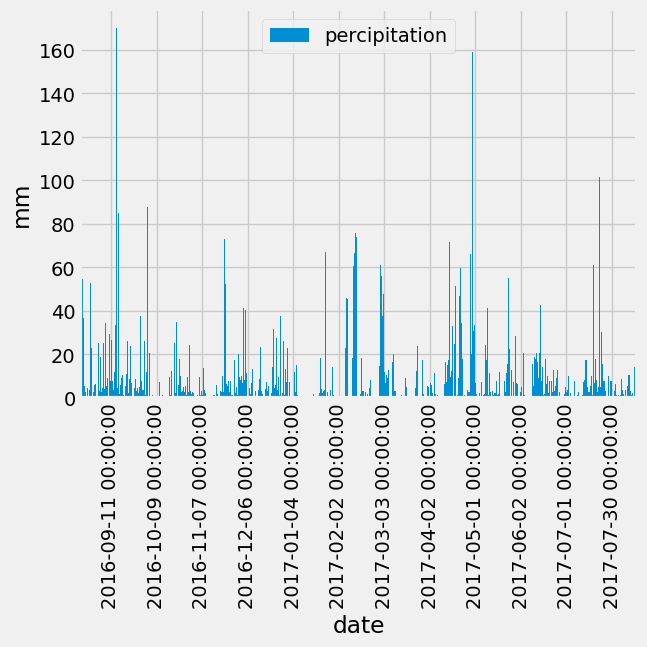

In [282]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
from sqlalchemy import and_

# Starting from the most recent data point in the database.
start_date = datetime.strptime(most_recent_date[0], '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
end_date = start_date - relativedelta(months=+12)

# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= end_date.strftime('%Y-%m-%d')).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(result, columns=['prcp','date'])
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


# Sort the dataframe by date
df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot.bar(y='prcp', label='percipitation', width=3)
ax.grid(True)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13),interval=6))
ax.yaxis.set_label_text(label='mm')
plt.show()




In [283]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [284]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [285]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_list = session.query(Measurement.station, 
   func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_list


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [286]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = most_active_list[0][0]
session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()


[(29.4, 12.2, 22.03582251082252)]

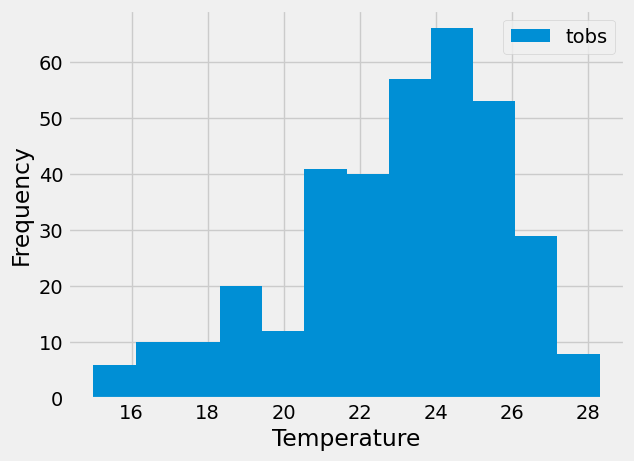

In [293]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date >= end_date.strftime('%Y-%m-%d')).filter(Measurement.station == most_active_station_id).all()
histo_df = pd.DataFrame(result,columns=['Temperature','Date'])
histo_df.set_index('Date',inplace=True)
df.sort_index(inplace=True)
ax = histo_df.plot.hist(y='Temperature',label='tobs', bins=12)
ax.xaxis.set_label_text(label='Temperature')
ax.grid(True)
plt.show()

# Close session

In [288]:
# Close Session
session.close()